In [10]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('cars.csv')
df.columns = ['mpg', 
              'cylinders', 
              'cubicinches', 
              'hp', 
              'weightlbs', 
              'time-to-60',
              'year', 
              'brand']

df_kmeans = df[['cylinders', 'weightlbs']].copy()

In [15]:
df_kmeans

,cylinders,weightlbs
0,8,4209
1,4,1925
2,8,3449
3,8,3761
4,4,2051
5,8,3900
6,8,4363
7,8,4312
8,5,3530
9,4,2050


In [16]:
# Normalize your data
scaler = StandardScaler()

# Check for blank spaces and replace with NaNs
df_kmeans.replace(r'\s+|^$', np.nan, regex=True, inplace=True)
df_kmeans.isnull().sum()

cylinders    0
weightlbs    3
dtype: int64

In [17]:
# Drop NaN values
df_kmeans.dropna(inplace=True)
df_kmeans.isnull().sum()

cylinders    0
weightlbs    0
dtype: int64

In [18]:
df_kmeans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 258 entries, 0 to 260
Data columns (total 2 columns):
cylinders    258 non-null int64
weightlbs    258 non-null object
dtypes: int64(1), object(1)
memory usage: 6.0+ KB


In [5]:
df_kmeans_normalized = scaler.fit_transform(df_kmeans)
df_kmeans_normalized = pd.DataFrame(df_kmeans_normalized)
df_kmeans_normalized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 2 columns):
0    258 non-null float64
1    258 non-null float64
dtypes: float64(2)
memory usage: 4.1 KB


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [6]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_kmeans_normalized)  
print('\nCluster centres:')
print(kmeans.cluster_centers_)


Cluster centres:
[[-0.9263465  -0.84070631]
 [ 1.38585348  1.2409904 ]
 [ 0.20347849  0.20738794]]


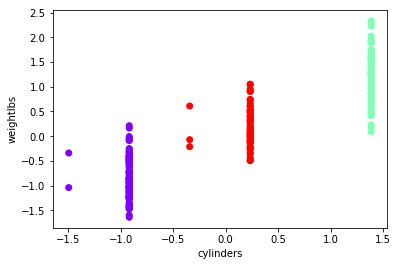

In [7]:
# Plot clusters
labels = kmeans.labels_

plt.scatter(df_kmeans_normalized[0],df_kmeans_normalized[1],
            c=labels, cmap=plt.cm.rainbow)

plt.xlabel('cylinders')
plt.ylabel('weightlbs')
plt.show()

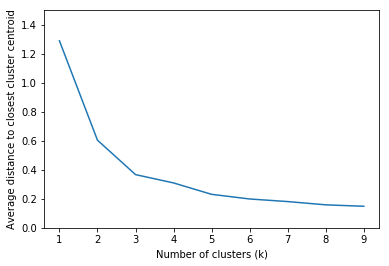

In [8]:
distance_to_cluster_centre = []

for k in range(1,10):
    kmeans = KMeans(n_clusters=k)  
    kmeans.fit(df_kmeans_normalized)
    distance = np.min(kmeans.transform(df_kmeans_normalized),axis=1)
    average_distance = np.mean(distance)
    distance_to_cluster_centre.append(average_distance)

clusters = np.arange(len(distance_to_cluster_centre))+1
plt.plot(clusters, distance_to_cluster_centre)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average distance to closest cluster centroid')
plt.ylim(0,1.5)
plt.show()